#**Study Case 1.A: Evaluating Learning Personalization from Projects of MIT App Inventor: Introduction To Programming (K-Means)**


---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from prettytable import PrettyTable
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file = "/content/drive/My Drive/appinventor_analysis/dataset.csv"

In [4]:
df = pd.read_csv(file, sep=';')

**1) Seletecting columns to create the model from dataset:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

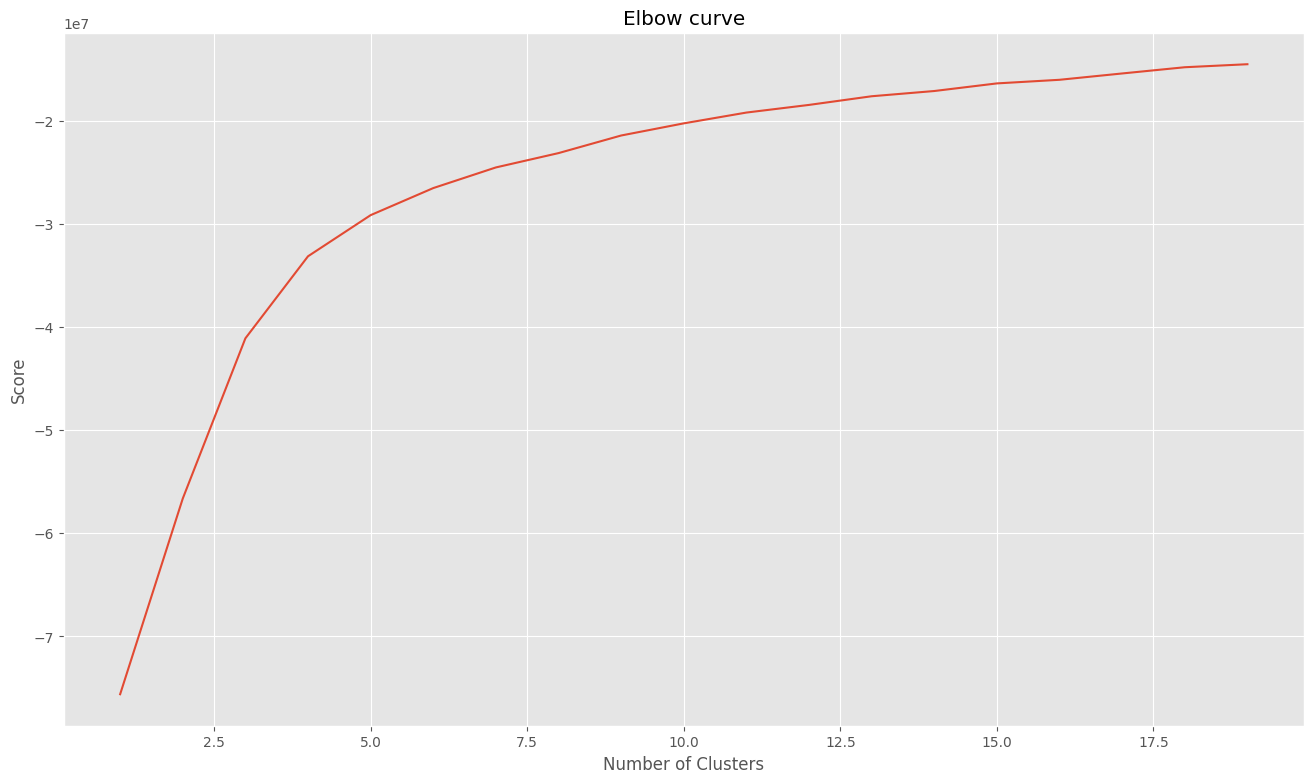

In [5]:
X = np.array(df[['NumberOfDefinedFunctionalBlocks','NumberOfUsedFunctionalBlocks','NumberOfEventsBlocks','NumberOfConditionalBlocks','NumberOfLoopsBlocks','NumberOfGlobalVariables','NumberOfLocalVariables']])


Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow curve')
plt.show()

**2) Trying with K=6:**

In [ ]:
kmeans = KMeans(n_clusters=6).fit(X)

centroids = kmeans.cluster_centers_

preds = KMeans(n_clusters=6).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.29973859354500243


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, kmeans.labels_)
print(score)

1.0718864617795634


In [ ]:
table = PrettyTable()
table.add_column('NumberOfDefinedFunctionalBlocks', [])
table.add_column('NumberOfUsedFunctionalBlocks', [])
table.add_column('NumberOfEventsBlocks', [])
table.add_column('NumberOfConditionalBlocks', [])
table.add_column('NumberOfLoopsBlocks', [])
table.add_column('NumberOfGlobalVariables', [])
table.add_column('NumberOfLocalVariables', [])

table.add_row(np.around(centroids[0],2))
table.add_row(np.around(centroids[1],2))
table.add_row(np.around(centroids[2],2))
table.add_row(np.around(centroids[3],2))
table.add_row(np.around(centroids[4],2))
table.add_row(np.around(centroids[5],2))

print(table)

+---------------------------------+------------------------------+----------------------+---------------------------+---------------------+-------------------------+------------------------+
| NumberOfDefinedFunctionalBlocks | NumberOfUsedFunctionalBlocks | NumberOfEventsBlocks | NumberOfConditionalBlocks | NumberOfLoopsBlocks | NumberOfGlobalVariables | NumberOfLocalVariables |
+---------------------------------+------------------------------+----------------------+---------------------------+---------------------+-------------------------+------------------------+
|               2.04              |            13.33             |         8.52         |            3.88           |         0.17        |           2.96          |          0.17          |
|               60.4              |            639.12            |        381.4         |           259.8           |         3.48        |          195.8          |         10.08          |
|               0.68              |          

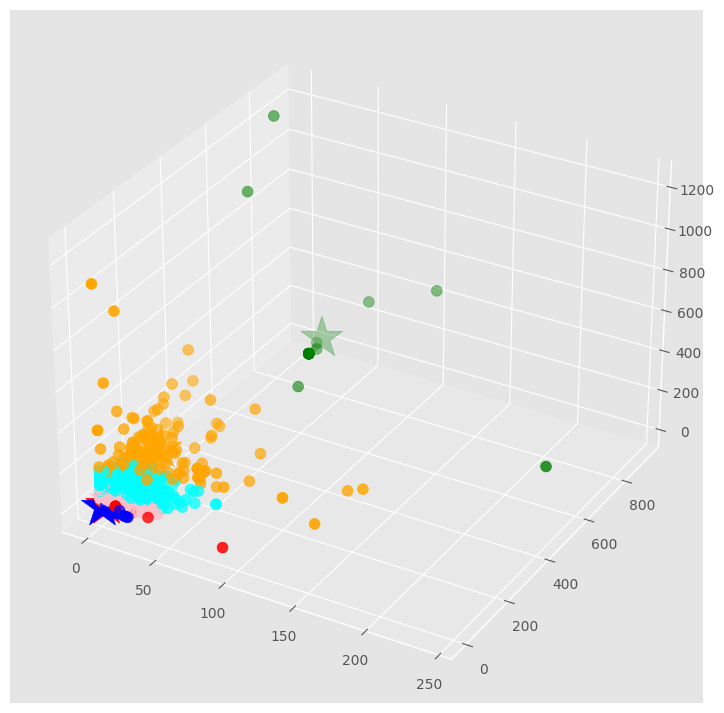

In [ ]:
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores = ['red','green','blue','cyan', 'pink', 'orange']
asignar = []

for row in labels:
  asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

plt.show()

In [ ]:
copy = pd.DataFrame()

copy['ProjectID'] = df['ProjectID'].values
copy['label'] = labels

cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
print(cantidadGrupo)

    color  cantidad
0     red     80434
1   green        25
2    blue    115504
3    cyan      2678
4    pink     16457
5  orange       146


**3) Trying with K=5:**

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)

centroids = kmeans.cluster_centers_

preds = KMeans(n_clusters=5).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.3734794480359408


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, kmeans.labels_)
print(score)

0.9920586462626522


In [ ]:
table = PrettyTable()
table.add_column('NumberOfDefinedFunctionalBlocks', [])
table.add_column('NumberOfUsedFunctionalBlocks', [])
table.add_column('NumberOfEventsBlocks', [])
table.add_column('NumberOfConditionalBlocks', [])
table.add_column('NumberOfLoopsBlocks', [])
table.add_column('NumberOfGlobalVariables', [])
table.add_column('NumberOfLocalVariables', [])

table.add_row(np.around(centroids[0],2))
table.add_row(np.around(centroids[1],2))
table.add_row(np.around(centroids[2],2))
table.add_row(np.around(centroids[3],2))
table.add_row(np.around(centroids[4],2))

print(table)

+---------------------------------+------------------------------+----------------------+---------------------------+---------------------+-------------------------+------------------------+
| NumberOfDefinedFunctionalBlocks | NumberOfUsedFunctionalBlocks | NumberOfEventsBlocks | NumberOfConditionalBlocks | NumberOfLoopsBlocks | NumberOfGlobalVariables | NumberOfLocalVariables |
+---------------------------------+------------------------------+----------------------+---------------------------+---------------------+-------------------------+------------------------+
|               0.85              |             4.77             |         6.08         |            3.2            |         0.26        |           3.15          |          0.3           |
|              10.05              |            126.39            |        103.32        |           34.36           |         1.5         |           17.5          |          1.81          |
|               2.53              |          

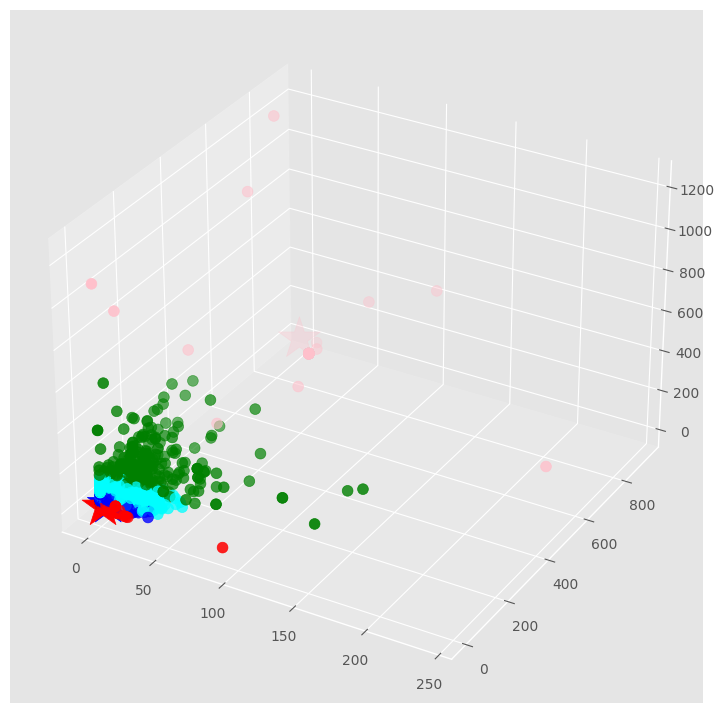

In [ ]:
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores = ['red','green','blue','cyan', 'pink']
asignar = []

for row in labels:
  asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

plt.show()

In [ ]:
copy = pd.DataFrame()

copy['ProjectID'] = df['ProjectID'].values
copy['label'] = labels

cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
print(cantidadGrupo)

   color  cantidad
0    red    147111
1  green       391
2   blue     61599
3   cyan      6114
4   pink        29


**4) Trying with K=4:**

In [ ]:
kmeans = KMeans(n_clusters=4).fit(X)

centroids = kmeans.cluster_centers_

preds = KMeans(n_clusters=4).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.39389599538137493


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, kmeans.labels_)
print(score)

0.9421240606404548


In [ ]:
table = PrettyTable()
table.add_column('NumberOfDefinedFunctionalBlocks', [])
table.add_column('NumberOfUsedFunctionalBlocks', [])
table.add_column('NumberOfEventsBlocks', [])
table.add_column('NumberOfConditionalBlocks', [])
table.add_column('NumberOfLoopsBlocks', [])
table.add_column('NumberOfGlobalVariables', [])
table.add_column('NumberOfLocalVariables', [])

table.add_row(np.around(centroids[0],2))
table.add_row(np.around(centroids[1],2))
table.add_row(np.around(centroids[2],2))
table.add_row(np.around(centroids[3],2))

print(table)

+---------------------------------+------------------------------+----------------------+---------------------------+---------------------+-------------------------+------------------------+
| NumberOfDefinedFunctionalBlocks | NumberOfUsedFunctionalBlocks | NumberOfEventsBlocks | NumberOfConditionalBlocks | NumberOfLoopsBlocks | NumberOfGlobalVariables | NumberOfLocalVariables |
+---------------------------------+------------------------------+----------------------+---------------------------+---------------------+-------------------------+------------------------+
|               0.89              |             5.05             |         6.13         |            3.24           |         0.25        |           3.12          |          0.3           |
|              46.08              |            513.27            |        393.81        |           216.05          |         4.35        |          145.89         |          7.08          |
|               2.61              |          

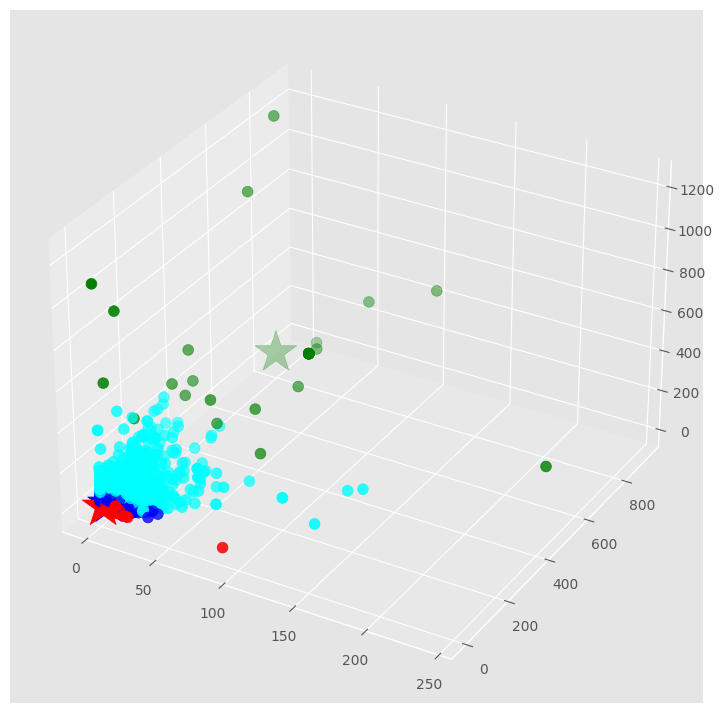

In [ ]:
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores = ['red','green','blue','cyan']
asignar = []

for row in labels:
  asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

plt.show()

In [ ]:
copy = pd.DataFrame()

copy['ProjectID'] = df['ProjectID'].values
copy['label'] = labels

cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
print(cantidadGrupo)

   color  cantidad
0    red    152968
1  green        37
2   blue     57853
3   cyan      4386


**4) Trying with K=3:**

In [7]:
kmeans = KMeans(n_clusters=3).fit(X)

centroids = kmeans.cluster_centers_

preds = KMeans(n_clusters=3).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Calculating Silhouette Score:**

In [8]:
score = silhouette_score(X, preds)
print(score)

0.6593592576818336


**Calculating Davies-Bouldin (DB) Score:**

In [9]:
score = davies_bouldin_score(X, kmeans.labels_)
print(score)

0.8029456570043876


In [10]:
table = PrettyTable()
table.add_column('NumberOfDefinedFunctionalBlocks', [])
table.add_column('NumberOfUsedFunctionalBlocks', [])
table.add_column('NumberOfEventsBlocks', [])
table.add_column('NumberOfConditionalBlocks', [])
table.add_column('NumberOfLoopsBlocks', [])
table.add_column('NumberOfGlobalVariables', [])
table.add_column('NumberOfLocalVariables', [])

table.add_row(np.around(centroids[0],2))
table.add_row(np.around(centroids[1],2))
table.add_row(np.around(centroids[2],2))

print(table)

+---------------------------------+------------------------------+----------------------+---------------------------+---------------------+-------------------------+------------------------+
| NumberOfDefinedFunctionalBlocks | NumberOfUsedFunctionalBlocks | NumberOfEventsBlocks | NumberOfConditionalBlocks | NumberOfLoopsBlocks | NumberOfGlobalVariables | NumberOfLocalVariables |
+---------------------------------+------------------------------+----------------------+---------------------------+---------------------+-------------------------+------------------------+
|               1.28              |             7.77             |         7.11         |            3.52           |         0.24        |           3.26          |          0.28          |
|              43.25              |            498.3             |        380.48        |           202.83          |         4.02        |          138.38         |          6.55          |
|               3.69              |          

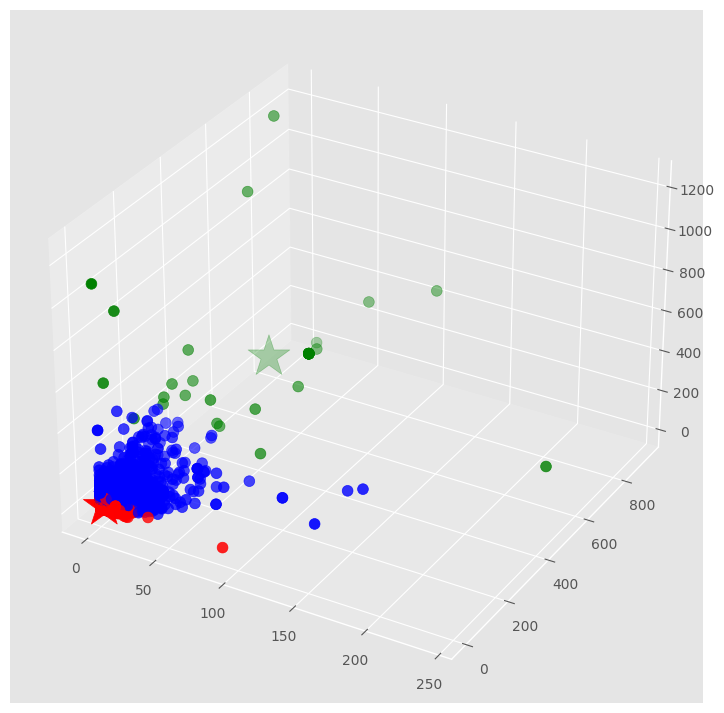

In [11]:
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores = ['red','green','blue']
asignar = []

for row in labels:
  asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

plt.show()

In [12]:
copy = pd.DataFrame()

copy['ProjectID'] = df['ProjectID'].values
copy['label'] = labels

cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
print(cantidadGrupo)

   color  cantidad
0    red    200681
1  green        40
2   blue     14523
